# Weaher Conditions and Accidents in NYC from 2016-2019.

This workbook pertains to the second step in visual analytics, we are first trying to investigate if there is any co-relation between the accident types and the weather conditions(rain,snow etc) on that particular day.


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## STEP1

We supplemented our A1 data from the US weather data from kaggle and tried to get the weather details on days when we had accidents.

In [27]:
df = pd.read_csv("./datasets/archive/WeatherEvents_Jan2016-Dec2022.csv")


In [28]:
df = df[df["City"]=="New York"]


In [29]:
def crashDateFunction(row):
    return str(row)[0:10]
    

In [30]:
df.columns

Index(['EventId', 'Type', 'Severity', 'StartTime(UTC)', 'EndTime(UTC)',
       'Precipitation(in)', 'TimeZone', 'AirportCode', 'LocationLat',
       'LocationLng', 'City', 'County', 'State', 'ZipCode'],
      dtype='object')

We then converted the attribute to the Date attribute and then used it for doing a inner join with an existing data.

In [31]:
df["CRASH DATE"] = df["StartTime(UTC)"].map(crashDateFunction)
df = df.drop(["StartTime(UTC)","EndTime(UTC)"],axis=1)
df

,EventId,Type,Severity,Precipitation(in),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode,CRASH DATE
999238,W-1054364,Cold,Severe,0.00,US/Eastern,KNYC,40.7790,-73.9692,New York,New York,NY,10024.0,2016-01-08
999239,W-1054365,Cold,Severe,0.00,US/Eastern,KNYC,40.7790,-73.9692,New York,New York,NY,10024.0,2016-01-09
999240,W-1054366,Rain,Light,0.00,US/Eastern,KNYC,40.7790,-73.9692,New York,New York,NY,10024.0,2016-01-09
999241,W-1054367,Rain,Light,0.14,US/Eastern,KNYC,40.7790,-73.9692,New York,New York,NY,10024.0,2016-01-10
999242,W-1054368,Rain,Moderate,0.48,US/Eastern,KNYC,40.7790,-73.9692,New York,New York,NY,10024.0,2016-01-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1925365,W-2031380,Rain,Light,0.00,US/Eastern,KJRB,40.7012,-74.0090,New York,New York,NY,10004.0,2022-12-31
1925366,W-2031381,Fog,Severe,0.00,US/Eastern,KJRB,40.7012,-74.0090,New York,New York,NY,10004.0,2022-12-31
1925367,W-2031382,Rain,Light,0.07,US/Eastern,KJRB,40.7012,-74.0090,New York,New York,NY,10004.0,2022-12-31
1925368,W-2031383,Fog,Severe,0.00,US/Eastern,KJRB,40.7012,-74.0090,New York,New York,NY,10004.0,2022-12-31


## Segregation of Data based on month

We then added another attribute called ACCIDENT_MONTH that will contain the details(month number) regarding the month of the accident, we will be using for the plotting the month wise analysis.

In [32]:
df["CRASH DATE"] = pd.to_datetime(df["CRASH DATE"])
df["ACCIDENT_MONTH"] = df["CRASH DATE"].dt.month
# df["ACCIDENT_MONTH"] = df["ACCIDENT_MONTH"].astype(str)
df["CRASH DATE"] = df["CRASH DATE"].map(crashDateFunction)

# Plotting of Accidents

We then plot the stacked bar charts for the months for a particular year and these kind of stacked bar charts for months will be plotted for multiple years. From the previous step, we had noticed that there might be seasonal effects causing changes in accident trend, and we can see that there are around 6 weather factors that are contributing to the accidents.

# Inferences:

1) We have basically done the inner join between the two dataframes on the Accident_Data and thus coupling the accident and weather condition of the area of accident, moreover these groups do give us an idea about the possibility of accidents due to challenging weather conditions and don't guarentee it.
2) There is in general a higher trend of accidents towards rain and precipitation over the months more than others.


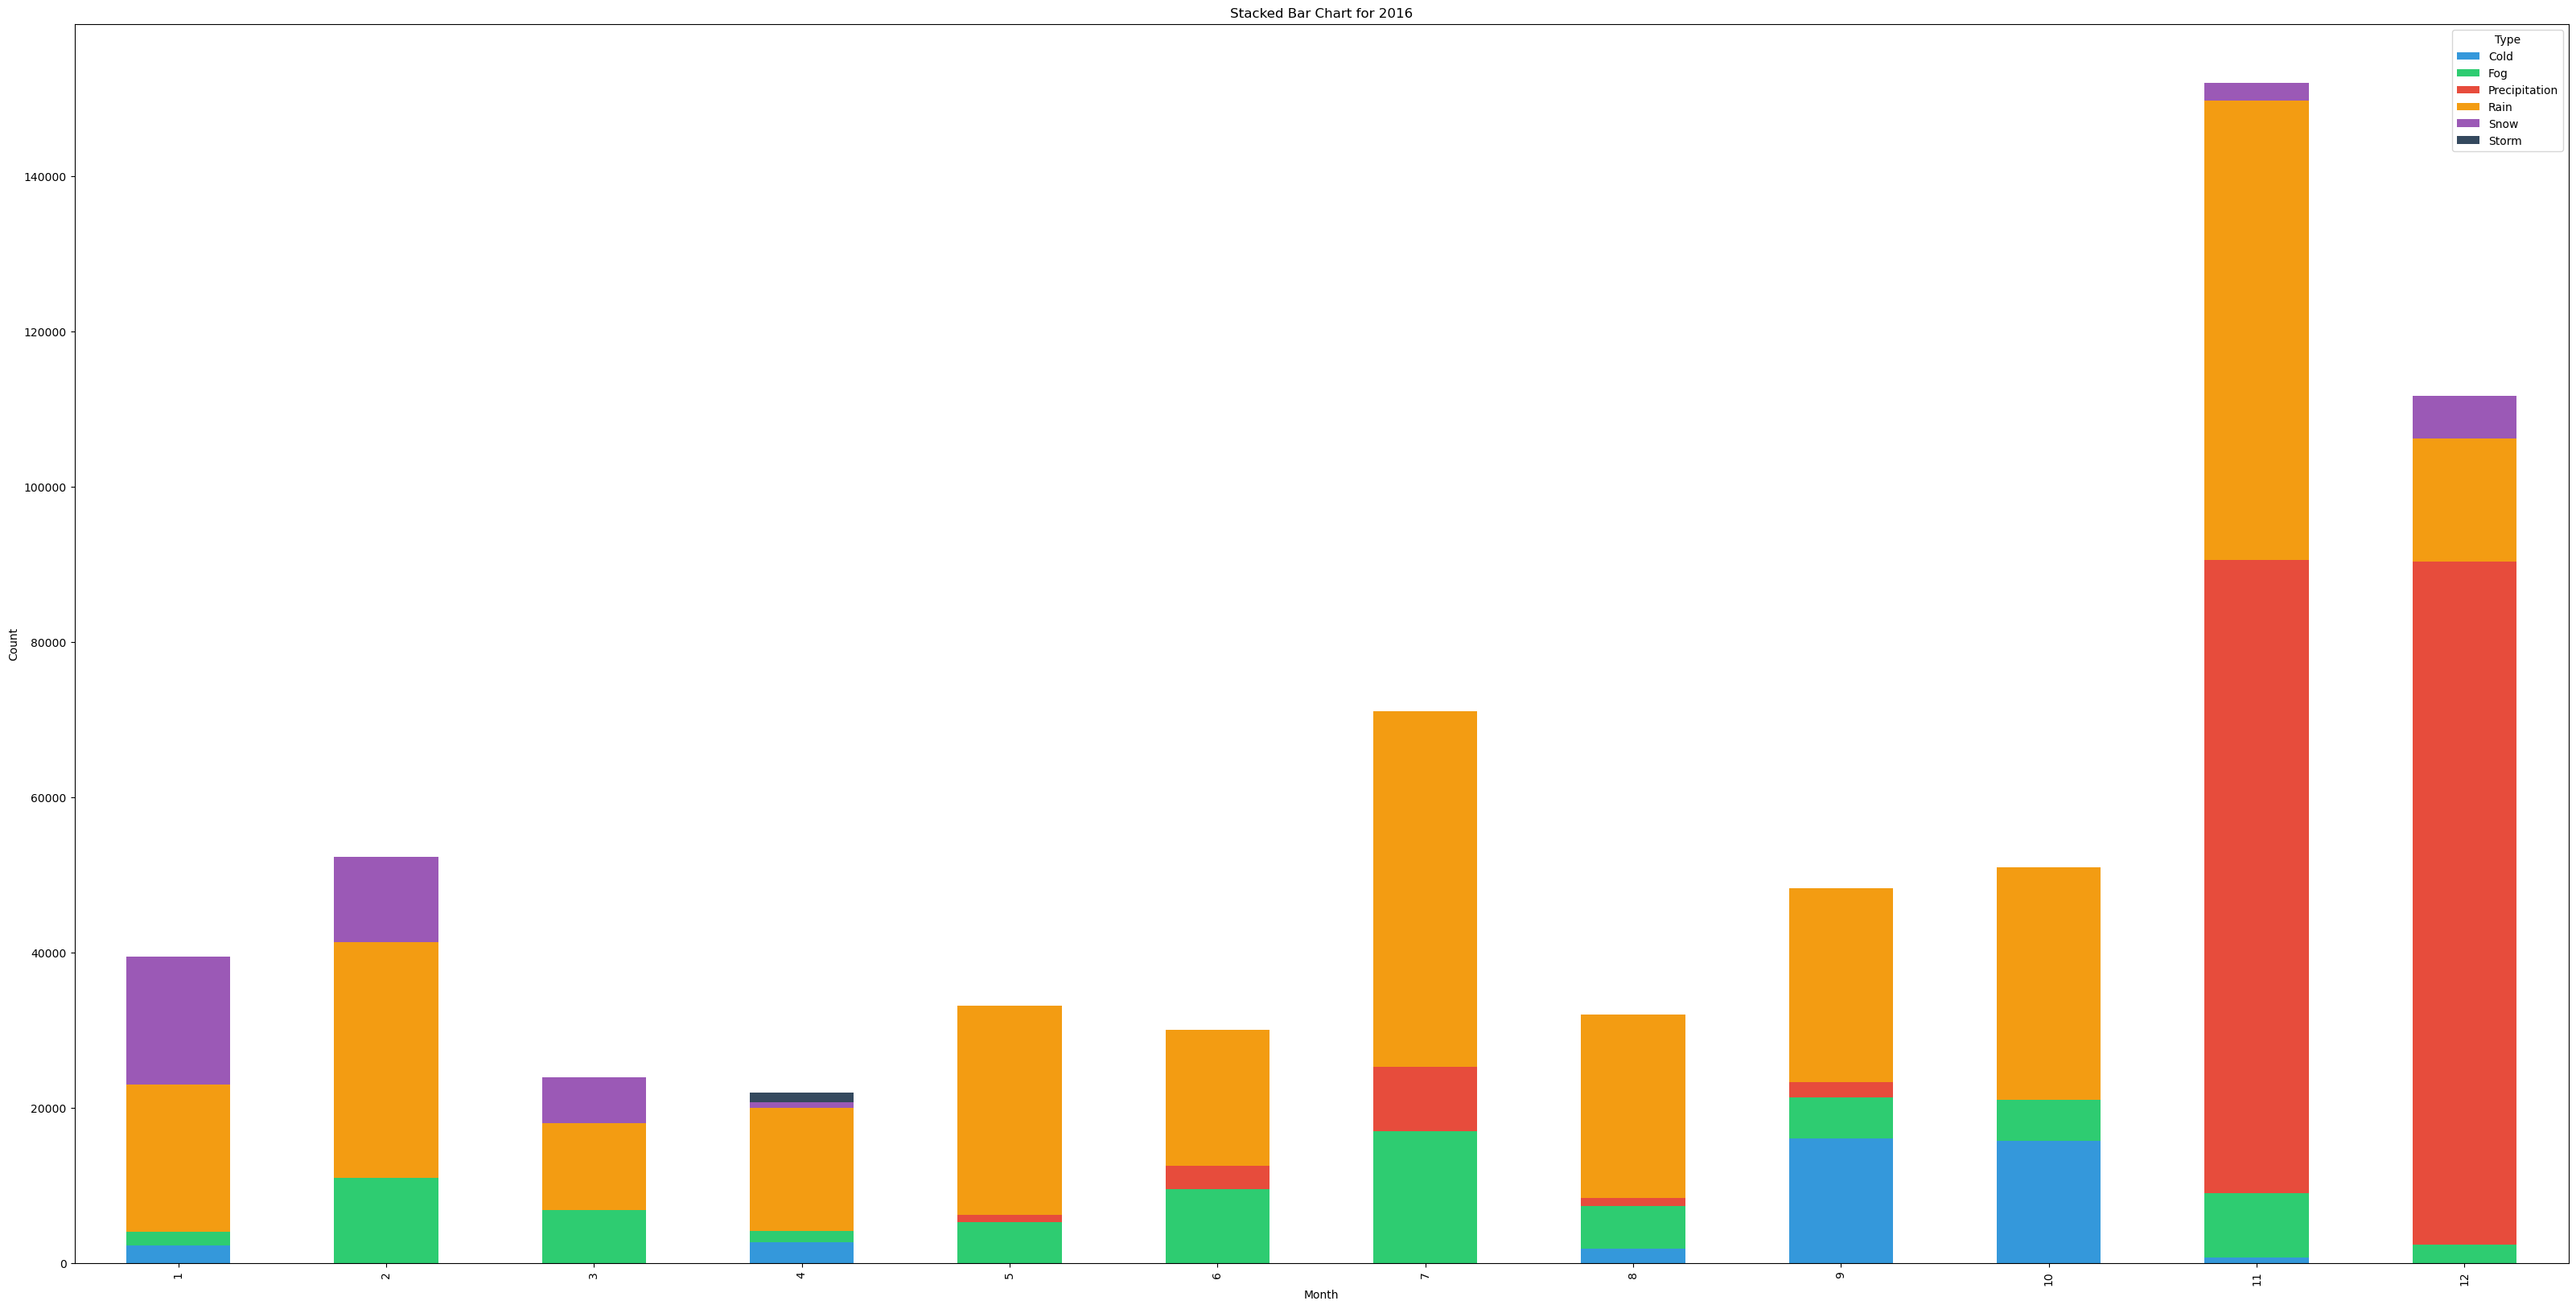

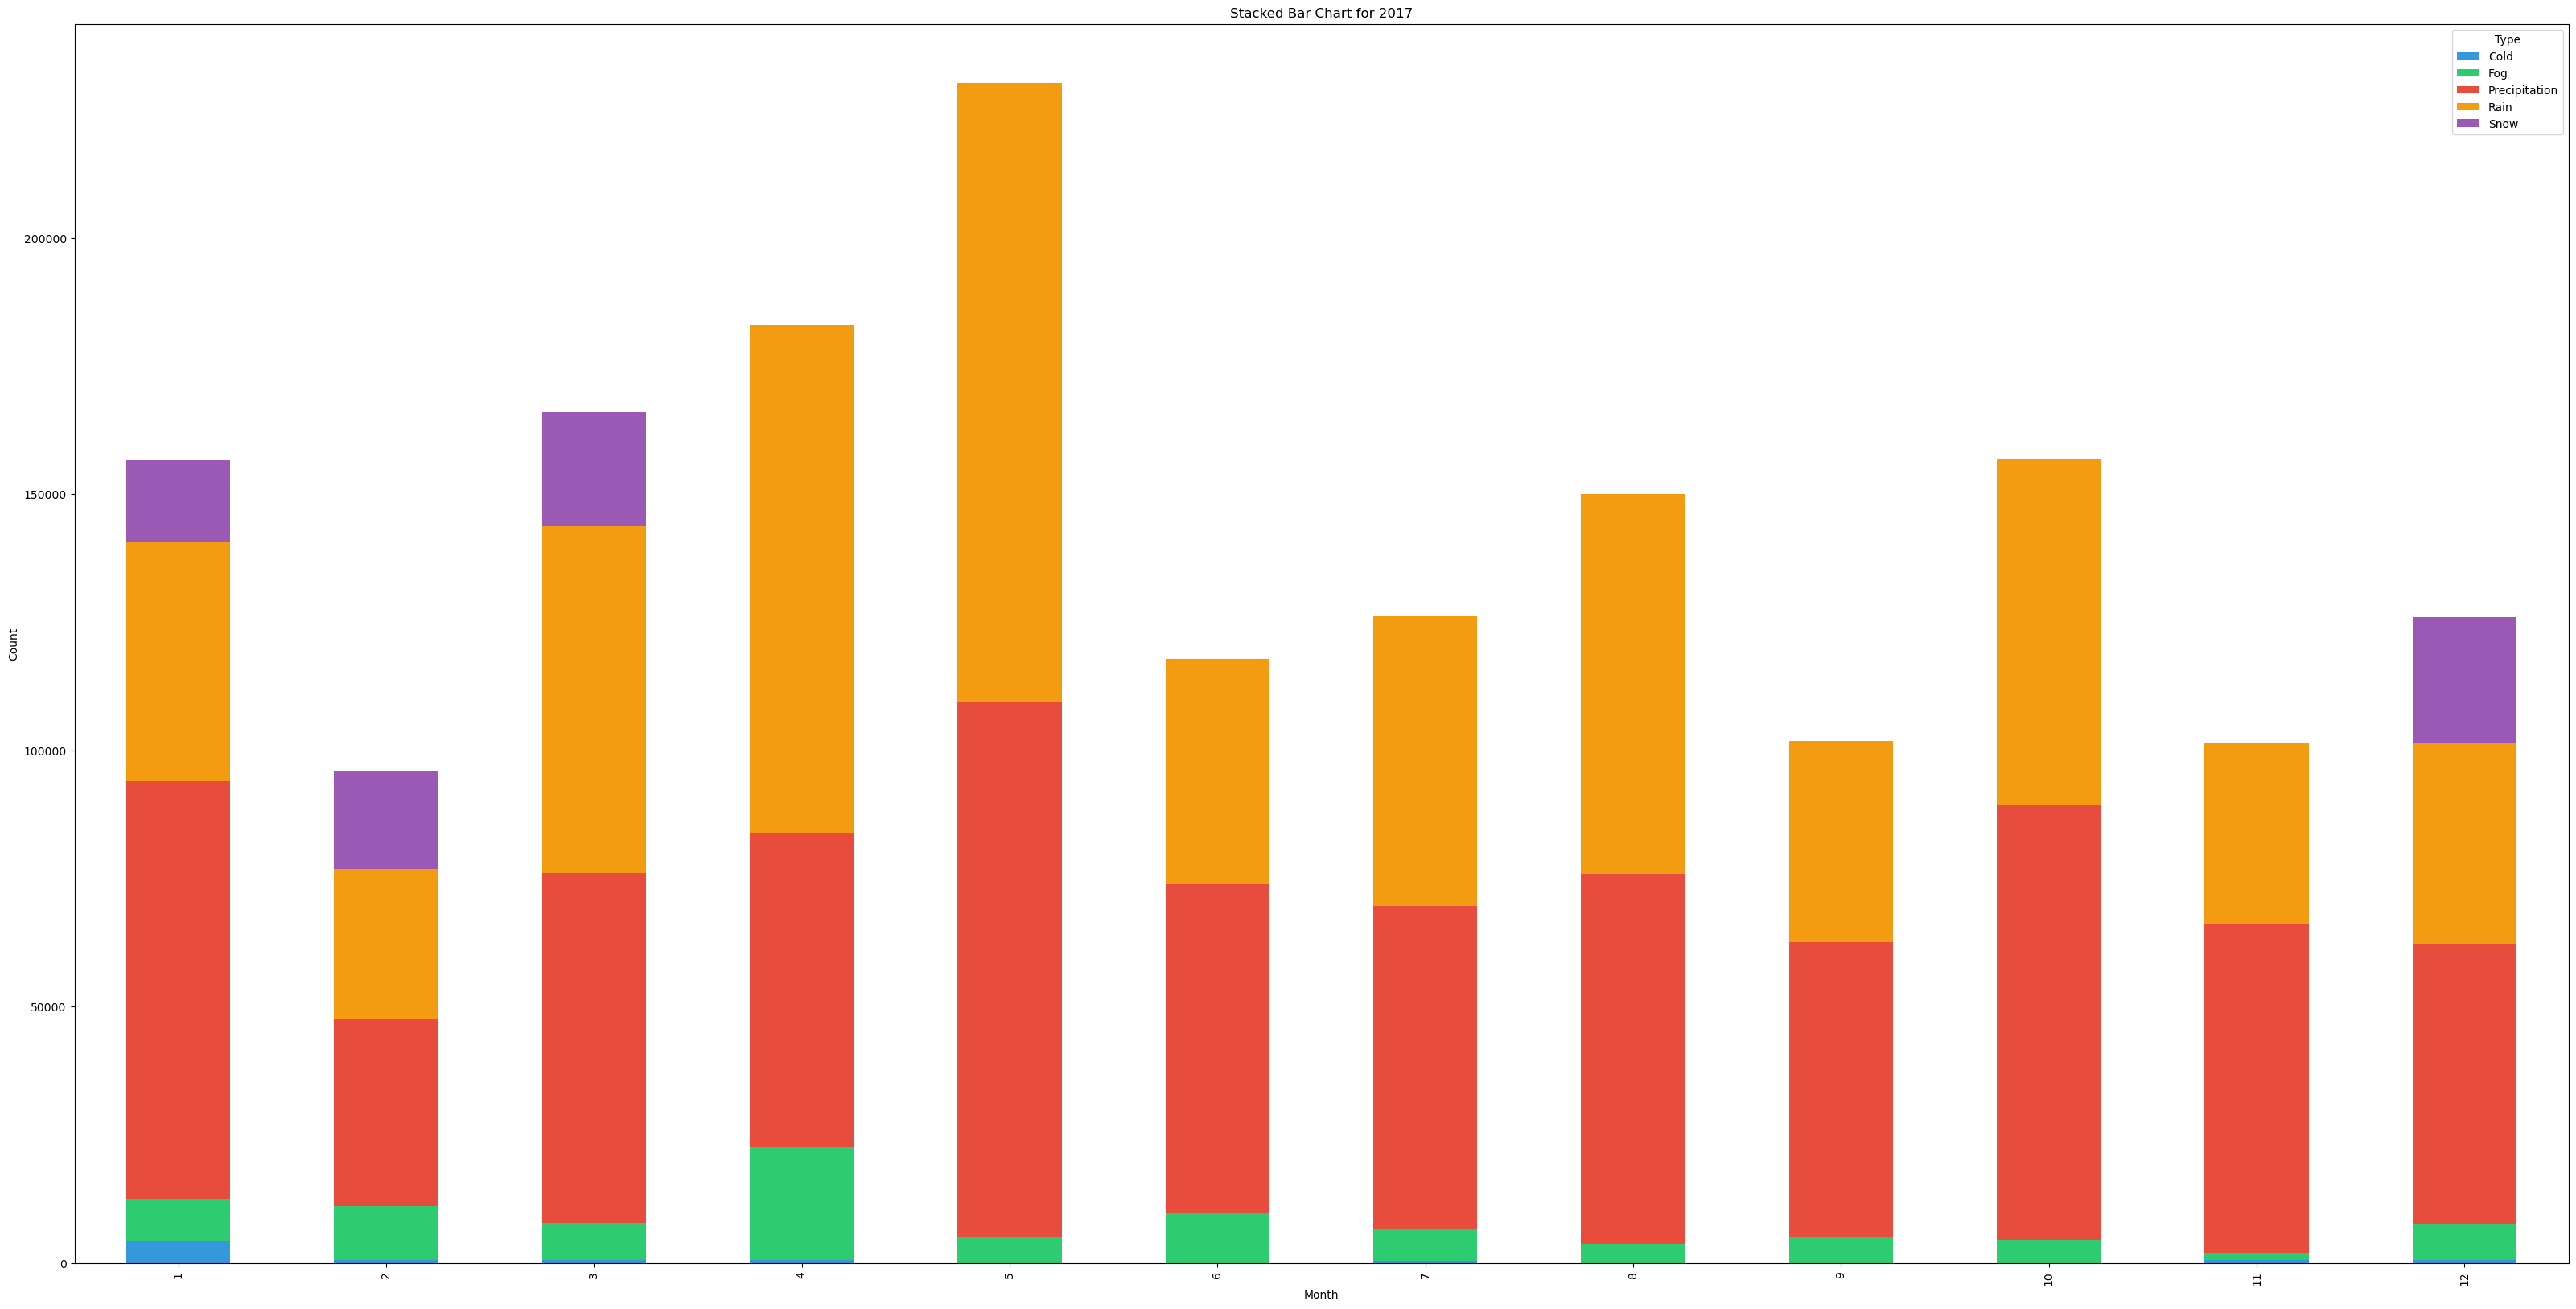

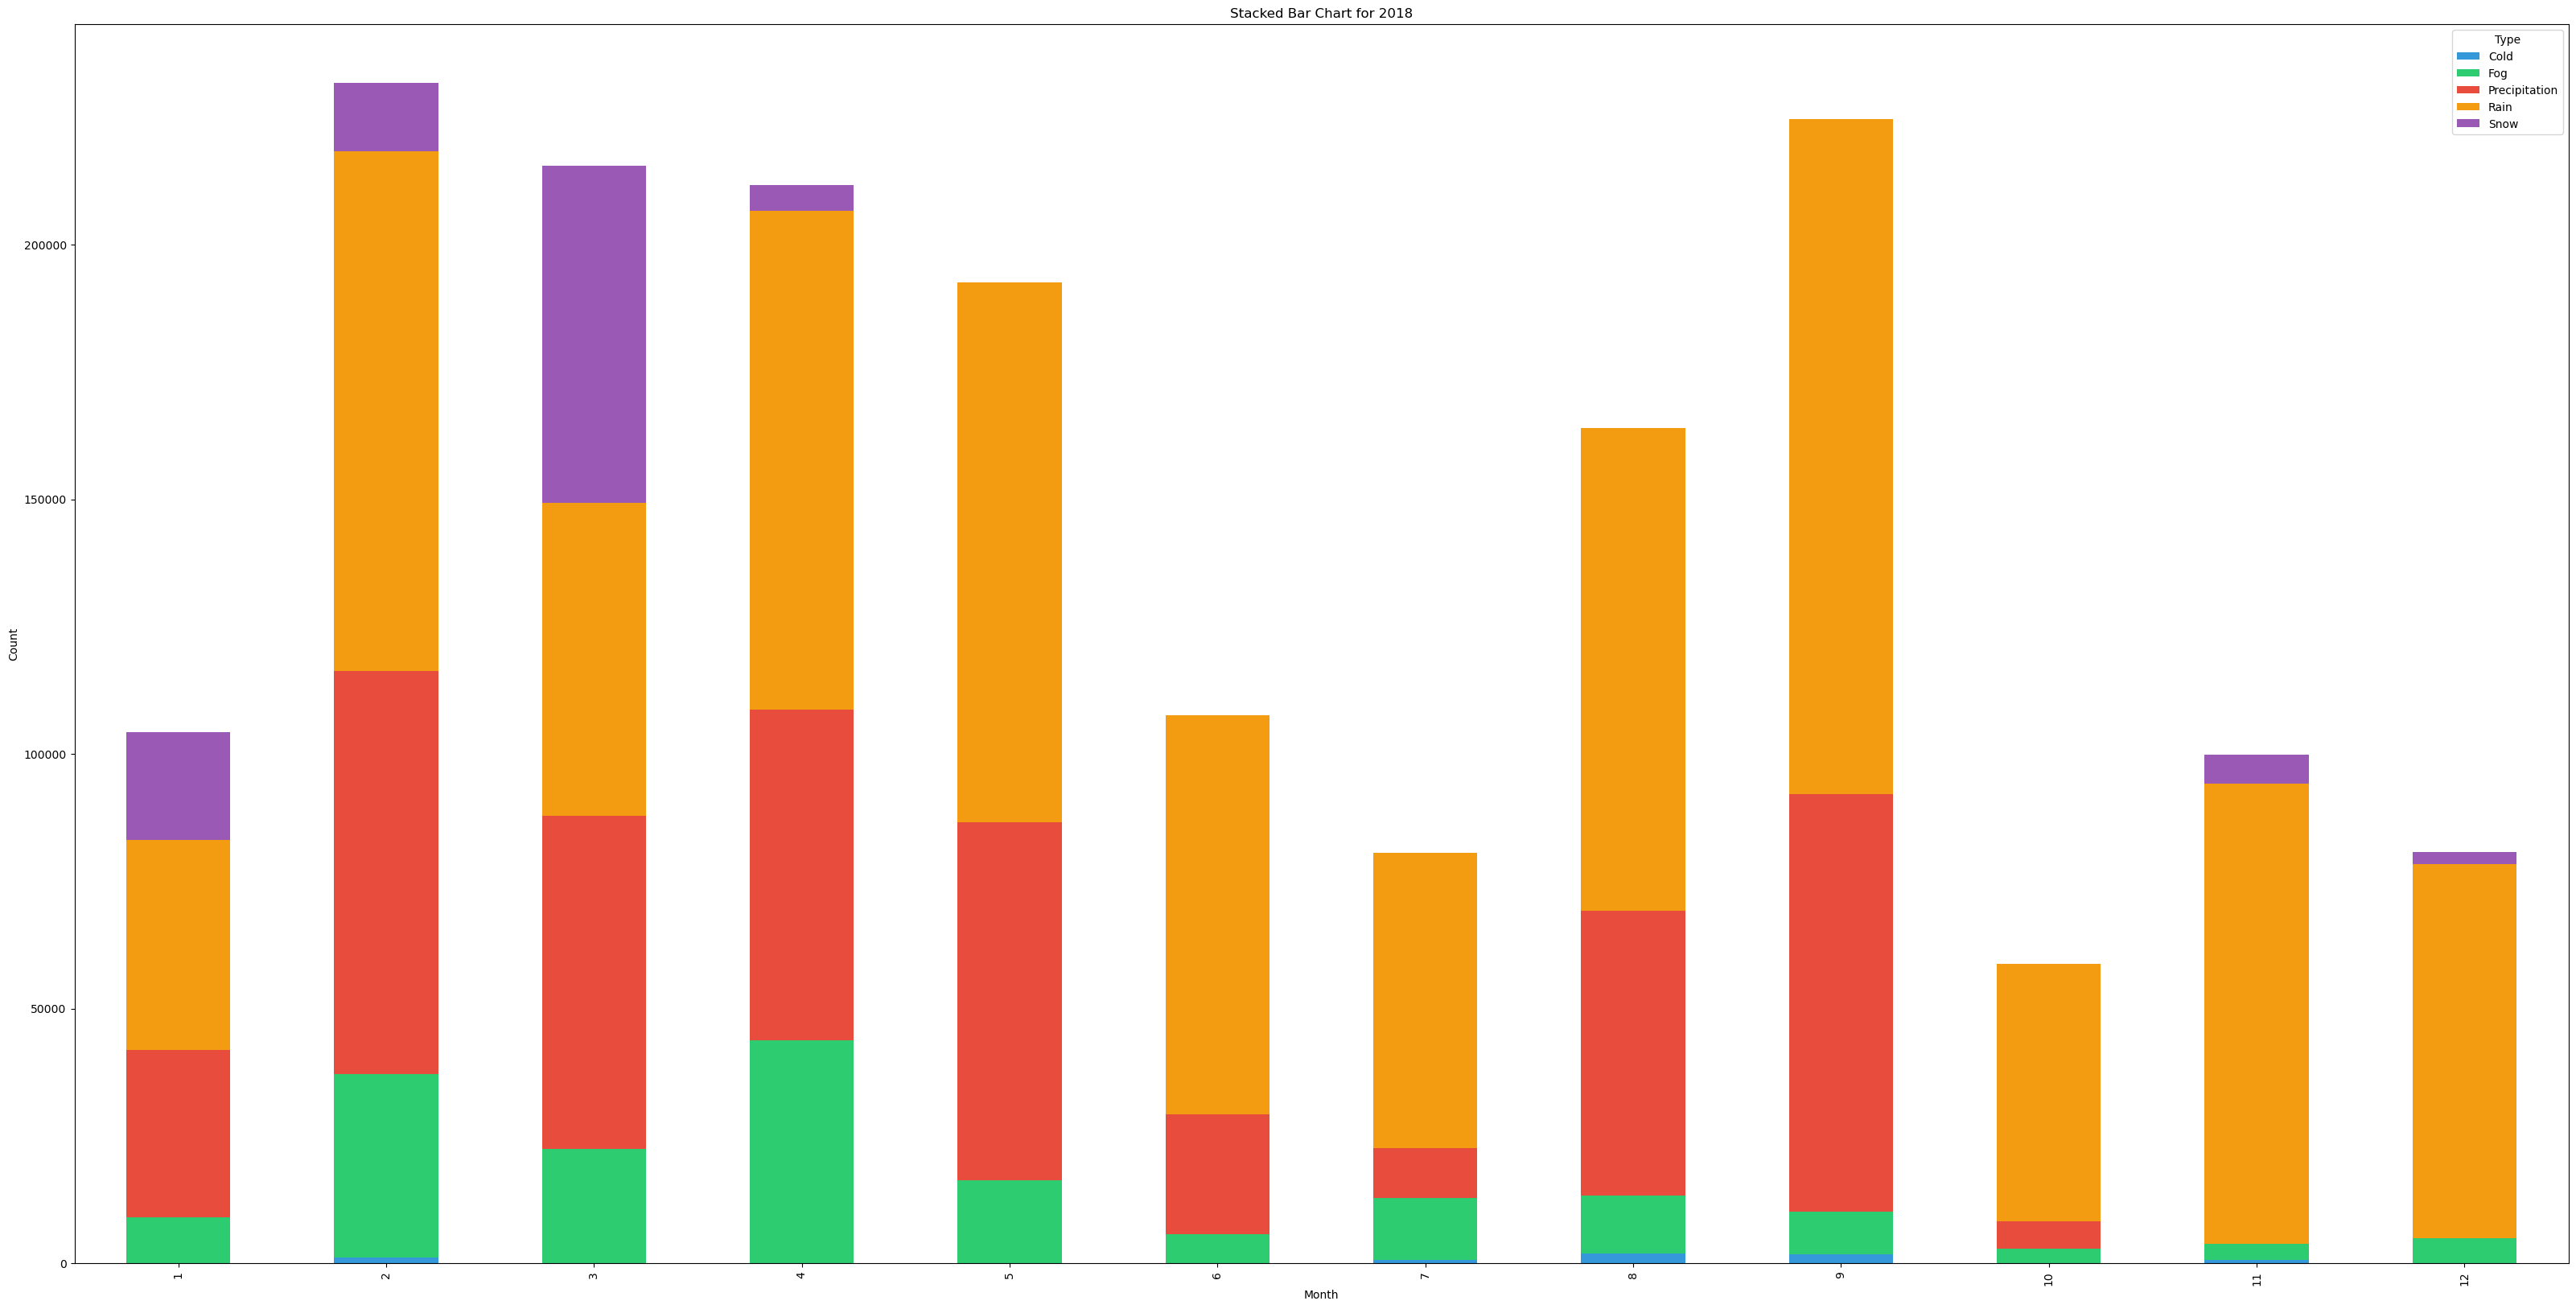

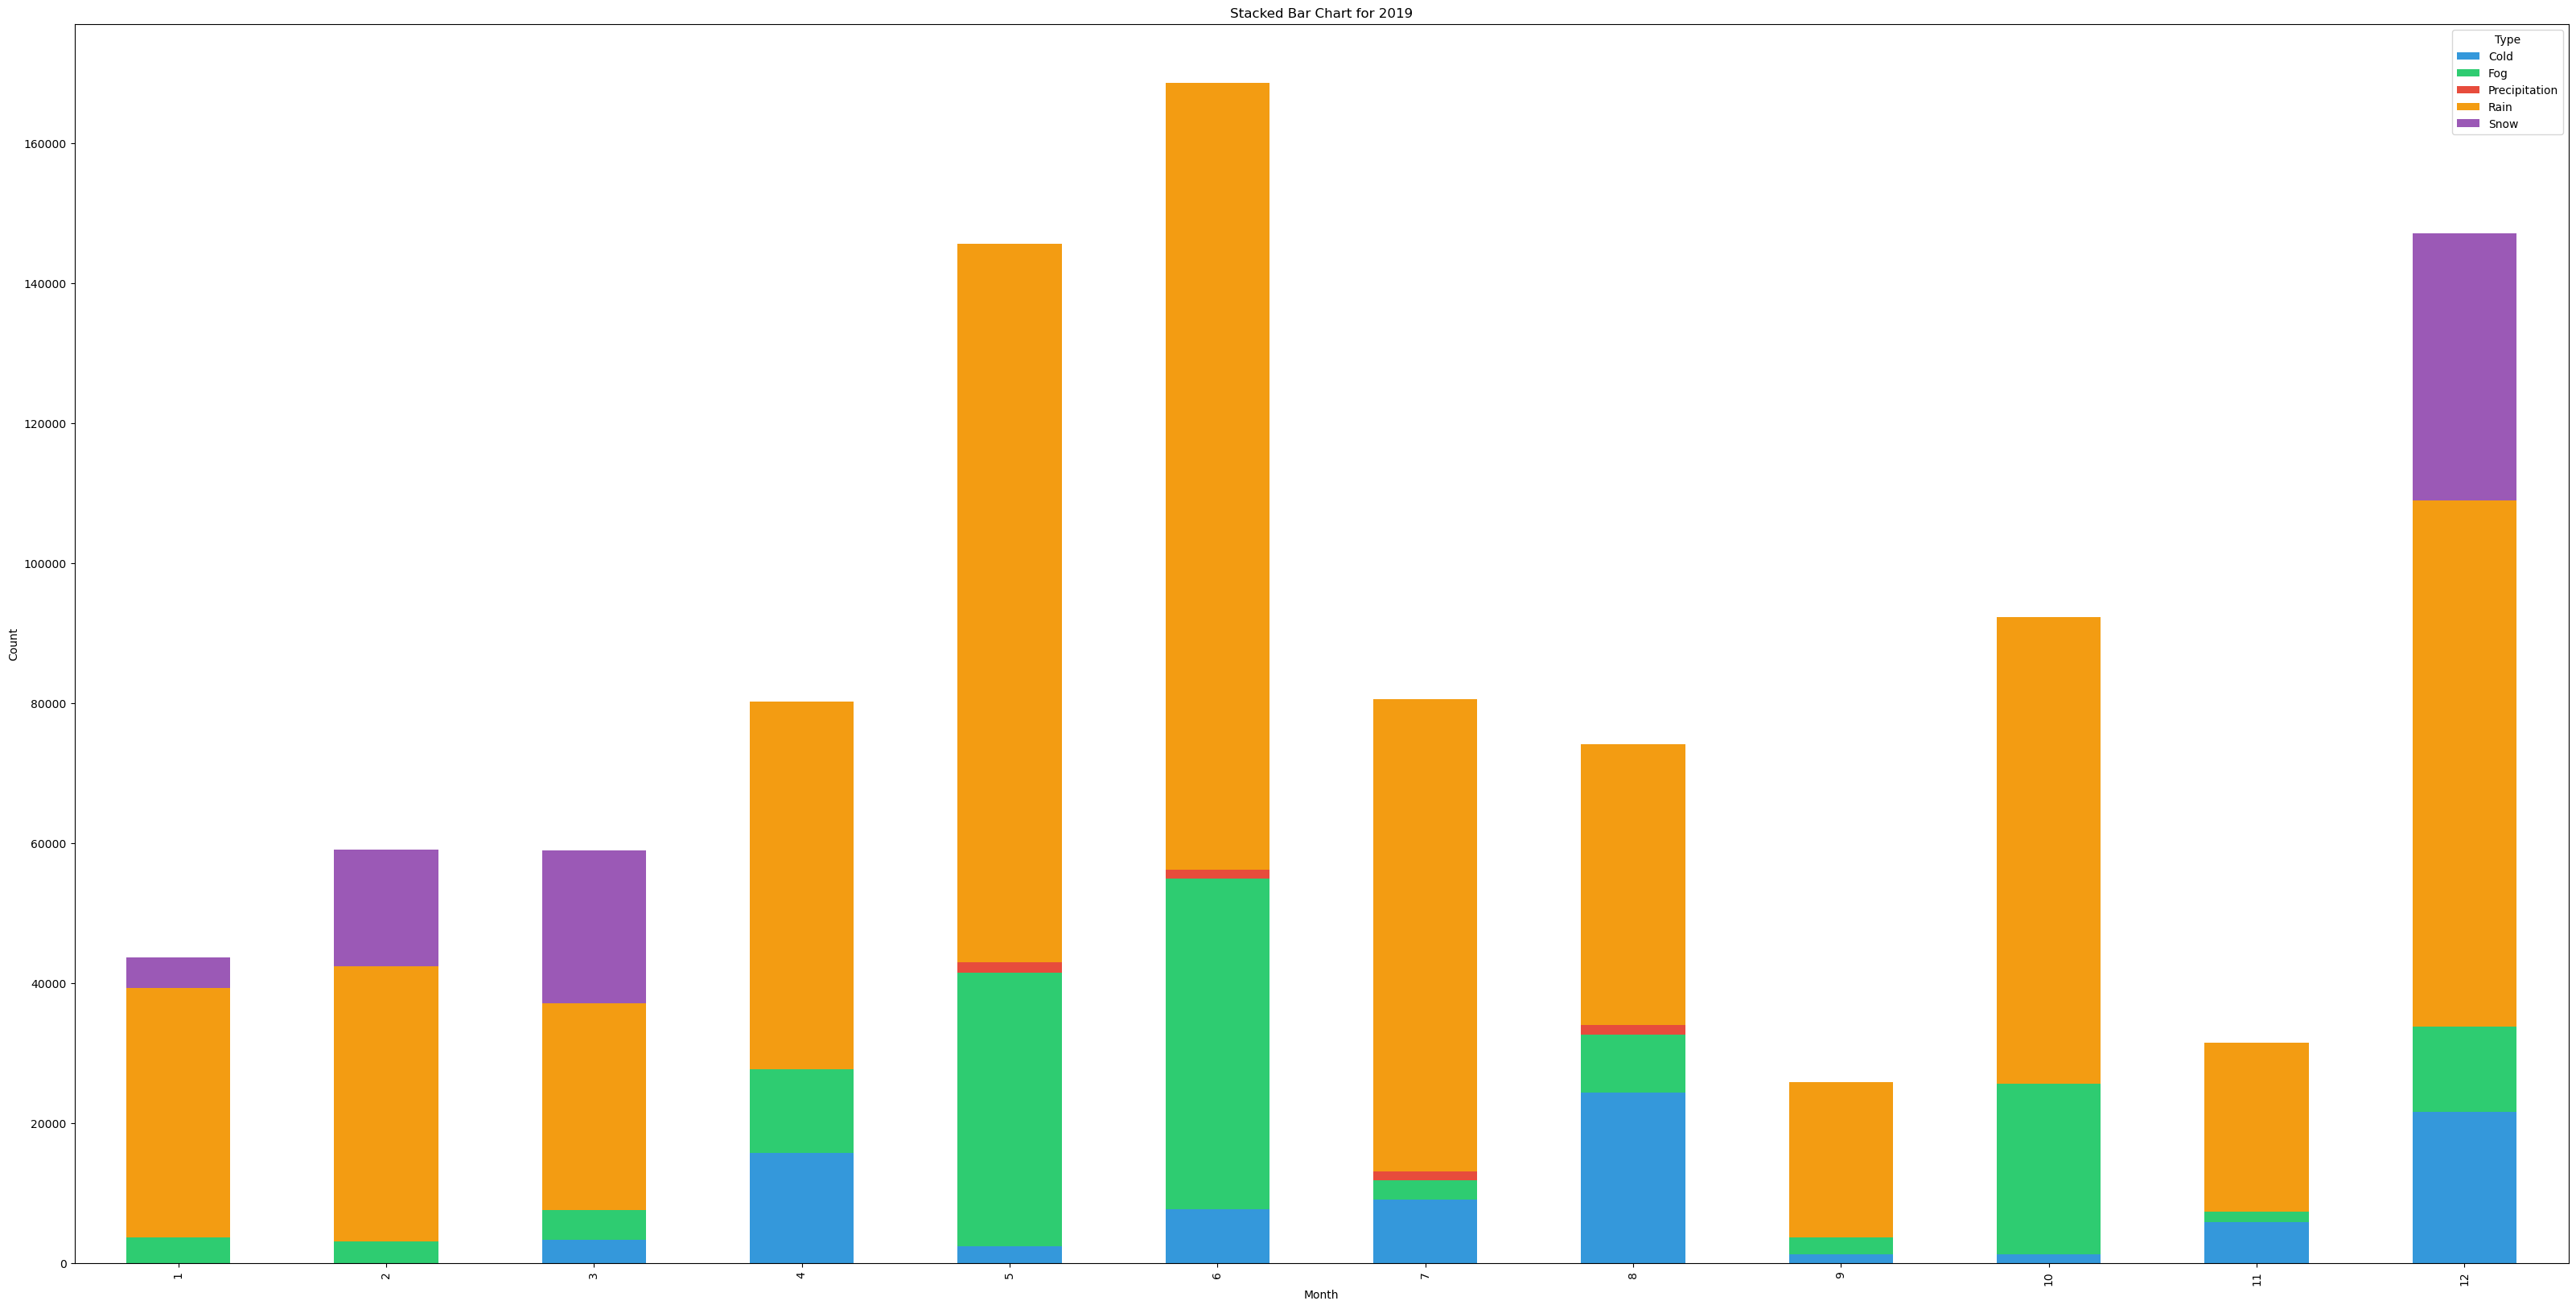

In [39]:
plt.rcParams['figure.figsize'] = (40,20)
colors = ['#3498db', '#2ecc71', '#e74c3c', '#f39c12', '#9b59b6', '#34495e']
datasets = []
for i in range(2016, 2020):
    
    file = f"./datasets/crashes_2012-23/crashes_{i}.csv"

    result = pd.read_csv(file)
    result.dropna(subset=['CRASH DATE',"CRASH TIME"], inplace=True)
    result.sort_values("CRASH DATE",inplace=True)
    df.sort_values("CRASH DATE",inplace=True)
    result_df = pd.merge(result, df,on="CRASH DATE")
    result_df_new = result_df.groupby(by=["ACCIDENT_MONTH","Type"]).size().reset_index(name="Count")
    # result_df_new
    # display(result_df_new)
    pivot_df = result_df_new.pivot_table(index='ACCIDENT_MONTH', columns=['Type'], values='Count', fill_value=0)

    # Plotting stacked bar chart
    ax = pivot_df.plot(kind='bar',stacked=True,color=colors[:len(pivot_df.columns)])
    ax.set_xlabel('Month')
    ax.set_ylabel('Count')
    ax.set_title(f'Stacked Bar Chart for {i}')
    plt.show()
    # break